## Import all libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
from datetime import date
import math
import random
import swifter

In [169]:
#read in the data

chi_data = pd.read_csv("chicago_2017.csv")
chi_weather = pd.read_csv("weather_hourly_chicago.csv")

### Some Information about the data set

In [4]:
chi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829014 entries, 0 to 3829013
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   start_time          object
 1   end_time            object
 2   start_station_id    int64 
 3   end_station_id      int64 
 4   start_station_name  object
 5   end_station_name    object
 6   bike_id             int64 
 7   user_type           object
dtypes: int64(3), object(5)
memory usage: 233.7+ MB


In [5]:
chi_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43788 non-null  object 
 1   max_temp   43788 non-null  float64
 2   min_temp   43788 non-null  float64
 3   precip     43790 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


# Bike Usage

In [6]:
chi_data.describe()

start_station_id  end_station_id       bike_id
count      3.829014e+06    3.829014e+06  3.829014e+06
mean       1.803509e+02    1.805161e+02  3.425115e+03
std        1.328194e+02    1.329273e+02  1.861236e+03
min        2.000000e+00    2.000000e+00  1.000000e+00
25%        7.400000e+01    7.400000e+01  1.803000e+03
50%        1.560000e+02    1.560000e+02  3.583000e+03
75%        2.680000e+02    2.680000e+02  5.063000e+03
max        6.260000e+02    6.260000e+02  6.471000e+03

In [167]:
#chi_data.tail(30)

**No missing data** --> all parametes have 3 829 014 values

In [7]:
#chi_data["travel_delta"] = pd.to_datetime --> convert timedelta to seconds so that mean can be calculated

### Add new columns to the Dataframe

In [4]:
chi_data['start_time']= pd.to_datetime(chi_data['start_time'])

In [5]:
chi_data['end_time'] = pd.to_datetime(chi_data['end_time'])

In [6]:
chi_data['travel_delta'] = (chi_data['end_time']-chi_data['start_time'])

In [7]:
chi_data.sort_values(['start_time'], inplace = True)

In [17]:
chi_data["Weekday"] = chi_data['start_time'].swifter.apply(lambda dt: dt.weekday())

In [9]:
chi_data["Hour"] = chi_data['start_time'].swifter.apply(lambda dt: dt.hour

In [18]:
chi_data["Date"] = chi_data['start_time'].swifter.apply(lambda dt: dt.date())

In [11]:
chi_data["Month"] = chi_data['start_time'].swifter.apply(lambda dt: dt.month)

In [27]:
chi_data["Week"] = chi_data['start_time'].swifter.apply(lambda dt: dt.isocalendar()[1])

In [82]:
ch_winter = chi_data[(chi_data["Month"]<4)]

In [83]:
ch_spring = chi_data[(chi_data["Month"]>3) & (chi_data["Month"]<6)]

In [85]:
ch_summer = chi_data[(chi_data["Month"]>5) & (chi_data["Month"]<10)]

In [86]:
ch_autumn = chi_data[(chi_data["Month"]>9) & (chi_data["Month"]<12)]

In [18]:
number_bikes = len(chi_data['bike_id'].unique())
print("The overall number of bikes is {}".format(number_bike

The overall number of bikes is 6243


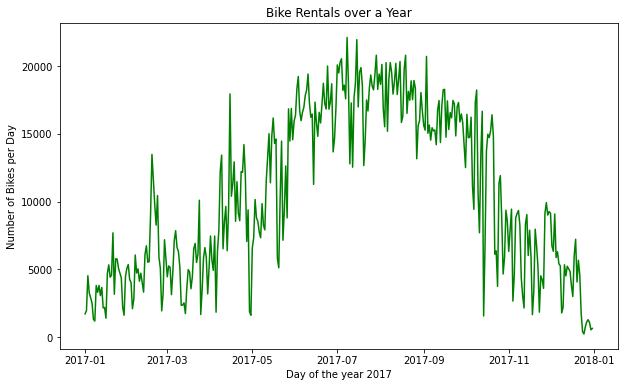

In [66]:
rentals_day = chi_data.groupby("Date")['bike_id'].count()
rentals_day = pd.DataFrame(rentals_day)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_day, c = "green")

ax.set_title('Bike Rentals over a Year')
ax.set_ylabel("Number of Bikes per Day")
ax.set_xlabel("Day of the year 2017")
plt.show()

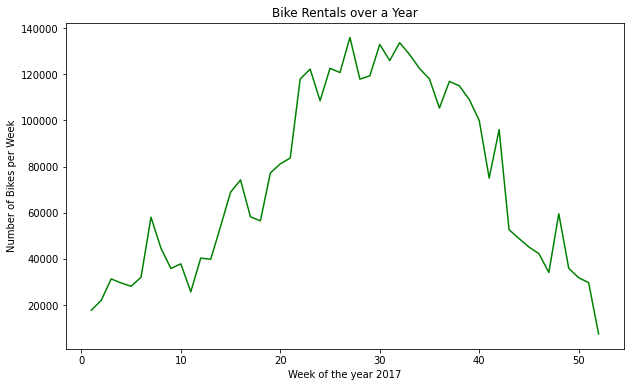

In [58]:
rentals_week = chi_data.groupby("Week")['bike_id'].count()
rentals_week = pd.DataFrame(rentals_week)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_day, c = "green")

ax.set_title('Bike Rentals over a Year')
ax.set_ylabel("Number of Bikes per Week")
ax.set_xlabel("Week of the year 2017")
plt.show()

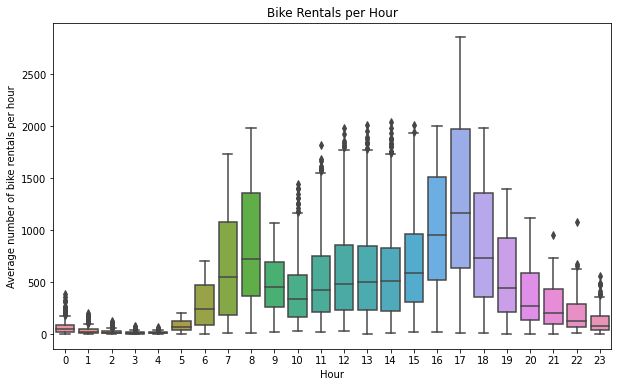

In [89]:
rentals_hour = chi_data.groupby(["Date","Hour"])['bike_id'].count()
rentals_hour =pd.DataFrame(rentals_hour)

fig, ax = plt.subplots(figsize = (10,6))


sns.boxplot(x = rentals_hour.index.get_level_values("Hour"), y =rentals_hour['bike_id'], ax = ax)
ax.set_ylabel("Average number of bike rentals per hour")
ax.set_title('Bike Rentals per Hour')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

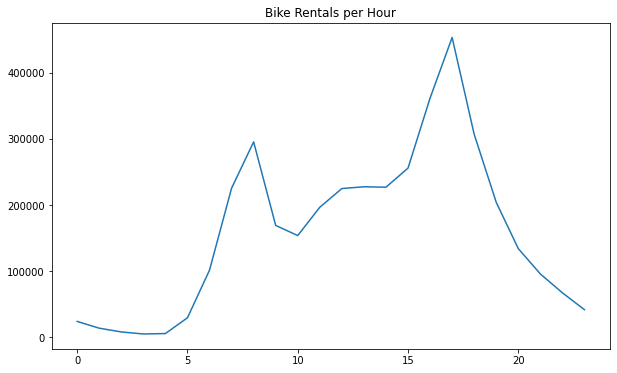

In [90]:
rentals_hour = chi_data.groupby(['Hour'])['bike_id'].count()
rentals_hour = pd.DataFrame(rentals_hour)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_hour)

ax.set_title('Bike Rentals per Hour')
plt.show

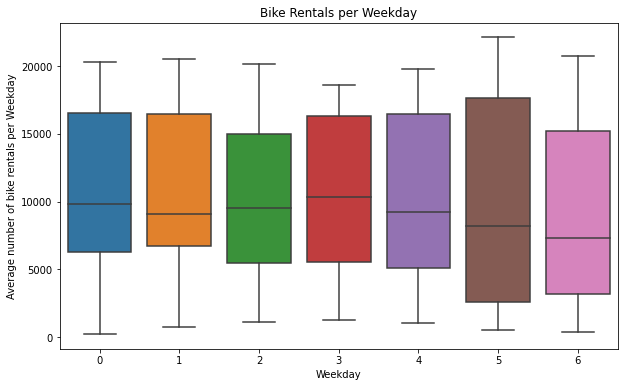

In [92]:
rentals_weekday = chi_data.groupby(['Date', 'Weekday'])['bike_id'].count()
rentals_weekday = pd.DataFrame(rentals_weekday)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = rentals_weekday.index.get_level_values('Weekday'), y =rentals_weekday['bike_id'], ax = ax)
ax.set_ylabel("Average number of bike rentals per Weekday")
ax.set_title('Bike Rentals per Weekday')
plt.show()

In [138]:
chi_data_Week_avail = chi_data.groupby(['Week'])['bike_id'].count()
chi_data_Week_avail = pd.DataFrame(chi_data_Week_avail)

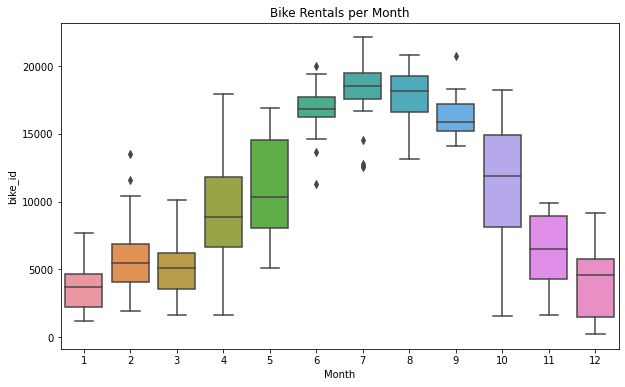

In [128]:
rentals_month = chi_data.groupby(['Date','Month'])['bike_id'].count()
rentals_month = pd.DataFrame(rentals_month)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = rentals_month.index.get_level_values('Month'), y =rentals_month['bike_id'], ax = ax)

ax.set_title('Bike Rentals per Month')
plt.show()

In [151]:
chi_data_Month_avail = chi_data.groupby(['Month'])['bike_id'].count()
chi_data_Month_avail = pd.DataFrame(chi_data_Month_avail)

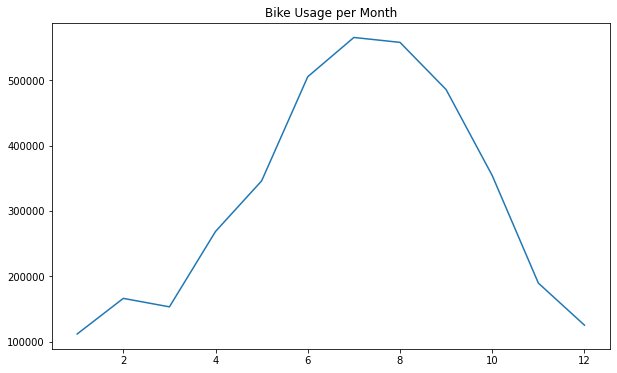

In [29]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(chi_data_Month_avail)

ax.set_title('Bike Usage per Month')
plt.show()

In [172]:
chi_data_Wday = chi_data.groupby(['Date', "Dummy_Wday"])['bike_id'].count()
chi_data_Wday = pd.DataFrame(chi_data_Wday)

fig, ax = plt.subplots(figsize = (8,4))

sns.boxplot(x = chi_data_Wday.index.get_level_values('Dummy_Wday'), y =chi_data_Wday['bike_id'], ax = ax)

ax.set_title('Bike Usage Wday (1) and Wend(0)')
plt.show()

KeyError: 'Date'

--> Hier nochmal durch die Anzahl der Wdays bzw. Wends teilen

Ideen
- als weitere Dimension noch die Länge der Reise (am Wochende eher länger oder kürzere Touren)

# Geographical

# Weather

In [98]:
#chi_weather.head(30)

In [99]:
chi_weather['date_time']=pd.to_datetime(chi_weather['date_time'])

In [101]:
first_date = datetime(year=2017, day=1, month=1)
last_date = datetime(year=2017, day=31, month=12)
chi_weather_2017 = chi_weather[(chi_weather['date_time']>=first_date)&(chi_weather["date_time"] <= last_date)]

In [102]:
chi_weather_2017.sort_values(by = "date_time", inplace = True)

<ipython-input-102-0c61a4185a2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017.sort_values(by = "date_time", inplace = True)


In [103]:
chi_weather_2017['Date']= chi_weather_2017["date_time"].dt.date

<ipython-input-103-dc2a551882f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017['Date']= chicago_weather_2017["date_time"].dt.date


In [104]:
chi_weather_2017['Weekday']= chi_weather_2017["date_time"].dt.weekday

<ipython-input-104-bfecda6ec4f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017['Weekday']= chicago_weather_2017["date_time"].dt.weekday


In [105]:
chi_weather_2017['Hour']= chi_weather_2017["date_time"].dt.hour

<ipython-input-105-f26ad119289e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017['Hour']= chicago_weather_2017["date_time"].dt.hour


In [106]:
chi_weather_2017['Month']= chi_weather_2017["date_time"].dt.month

<ipython-input-106-c9653efbc821>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017['Month']= chicago_weather_2017["date_time"].dt.month


In [120]:
chi_weather_2017["Week"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.isocalendar()[1])

<ipython-input-120-fc682e99e9c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017["Week"] = chicago_weather_2017['date_time'].swifter.apply(lambda dt: dt.isocalendar()[1])


In [107]:
chi_weather_2017["mean_temp"] = (chi_weather_2017['max_temp']+chi_weather_2017['min_temp'])/2

<ipython-input-107-c1a66da8a464>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017["mean_temp"] = (chicago_weather_2017['max_temp']+chicago_weather_2017['min_temp'])/2


In [166]:
chi_weather_2017.head(50)

date_time  max_temp  min_temp  precip        Date  Weekday  \
17543 2017-01-01 00:00:00      -0.6      -0.6     0.0  2017-01-01        6   
17520 2017-01-01 01:00:00      -2.2      -2.2     0.0  2017-01-01        6   
17521 2017-01-01 02:00:00      -2.8      -2.8     0.0  2017-01-01        6   
17522 2017-01-01 03:00:00      -3.3      -3.3     0.0  2017-01-01        6   
17523 2017-01-01 04:00:00      -3.3      -3.3     0.0  2017-01-01        6   
17524 2017-01-01 05:00:00      -3.9      -3.9     0.0  2017-01-01        6   
17525 2017-01-01 06:00:00      -4.4      -4.4     0.0  2017-01-01        6   
17550 2017-01-01 07:00:00      -5.0      -5.0     0.0  2017-01-01        6   
17551 2017-01-01 08:00:00      -6.1      -6.1     0.0  2017-01-01        6   
17552 2017-01-01 09:00:00      -6.1      -6.1     0.0  2017-01-01        6   
17553 2017-01-01 10:00:00      -7.2      -7.2     0.0  2017-01-01        6   
17554 2017-01-01 11:00:00      -6.1      -6.1     0.0  2017-01-01        6   
17555 2017-01-01 12:00:00      -7.8      -7.8     0.0  2017-01-01        6   
17556 2017-01-01 13:00:00      -6.7      -6.7     0.0  2017-01-01        6   
17557 2017-01-01 14:00:00      -6.7      -6.7     0.0  2017-01-01        6   
17558 2017-01-01 15:00:00      -4.4      -4.4     0.0  2017-01-01        6   
17559 2017-01-01 16:00:00      -2.2      -2.2     0.0  2017-01-01        6   
17560 2017-01-01 17:00:00      -0.6      -0.6     0.0  2017-01-01        6   
17561 2017-01-01 18:00:00       2.8       2.8     0.0  2017-01-01        6   
17562 2017-01-01 19:00:00       2.8       2.8     0.0  2017-01-01        6   
17563 2017-01-01 20:00:00       3.3       3.3     0.0  2017-01-01        6   
17564 2017-01-01 21:00:00       3.9       3.9     0.0  2017-01-01        6   
17565 2017-01-01 22:00:00       2.8       2.8     0.0  2017-01-01        6   
17566 2017-01-01 23:00:00       0.6       0.6     0.0  2017-01-01        6   
17567 2017-01-02 00:00:00       0.6       0.6     0.0  2017-01-02        0   
17544 2017-01-02 01:00:00       0.0       0.0     0.0  2017-01-02        0   
17545 2017-01-02 02:00:00       0.6       0.6     0.0  2017-01-02        0   
17546 2017-01-02 03:00:00       0.6       0.6     0.0  2017-01-02        0   
17547 2017-01-02 04:00:00       0.0       0.0     0.0  2017-01-02        0   
17548 2017-01-02 05:00:00      -1.1      -1.1     0.0  2017-01-02        0   
17549 2017-01-02 06:00:00      -1.7      -1.7     0.0  2017-01-02        0   
17574 2017-01-02 07:00:00      -1.1      -1.1     0.0  2017-01-02        0   
17575 2017-01-02 08:00:00      -2.2      -2.2     0.0  2017-01-02        0   
17576 2017-01-02 09:00:00      -1.7      -1.7     0.0  2017-01-02        0   
17577 2017-01-02 10:00:00      -1.7      -1.7     0.0  2017-01-02        0   
17578 2017-01-02 11:00:00       0.0       0.0     0.0  2017-01-02        0   
17579 2017-01-02 12:00:00       0.6       0.6     0.0  2017-01-02        0   
17580 2017-01-02 13:00:00       1.1       1.1     0.0  2017-01-02        0   
17581 2017-01-02 14:00:00       1.7       1.7     0.0  2017-01-02        0   
17582 2017-01-02 15:00:00       2.2       2.2     0.0  2017-01-02        0   
17583 2017-01-02 15:00:00       3.3       2.8     0.0  2017-01-02        0   
17584 2017-01-02 16:00:00       3.9       3.3     0.0  2017-01-02        0   
17585 2017-01-02 18:00:00       4.4       4.4     0.0  2017-01-02        0   
17586 2017-01-02 19:00:00       4.4       3.9     0.0  2017-01-02        0   
17587 2017-01-02 19:00:00       3.3       2.8     1.0  2017-01-02        0   
17588 2017-01-02 21:00:00       3.3       3.3     0.0  2017-01-02        0   
17590 2017-01-02 22:00:00       3.3       3.3     1.0  2017-01-02        0   
17589 2017-01-02 22:00:00       3.3       3.3     0.0  2017-01-02        0   
17591 2017-01-03 00:00:00       3.3       3.3     1.0  2017-01-03        1   
17568 2017-01-03 01:00:00       3.9       3.9     1.0  2017-01-03        1   

       Hour  Month  mean_temp  Week  

In [33]:
chi_weather_2017[chi_weather_2017["precip"]>0].count()

date_time    776
max_temp     776
min_temp     776
precip       776
Date         776
Weekday      776
Hour         776
Month        776
mean_temp    776
dtype: int64

## Weather Hourly

In [110]:
chi_weather_2017_temp_hourly_min = chi_weather_2017.groupby("date_time")["min_temp"].mean()
chi_weather_2017_temp_hourly_max = chi_weather_2017.groupby("date_time")["max_temp"].mean()
chi_weather_2017_temp_hourly_mean = chi_weather_2017.groupby("date_time")["mean_temp"].mean()
chi_weather_2017_precip_hourly = chi_weather_2017.groupby("date_time")["precip"].mean()

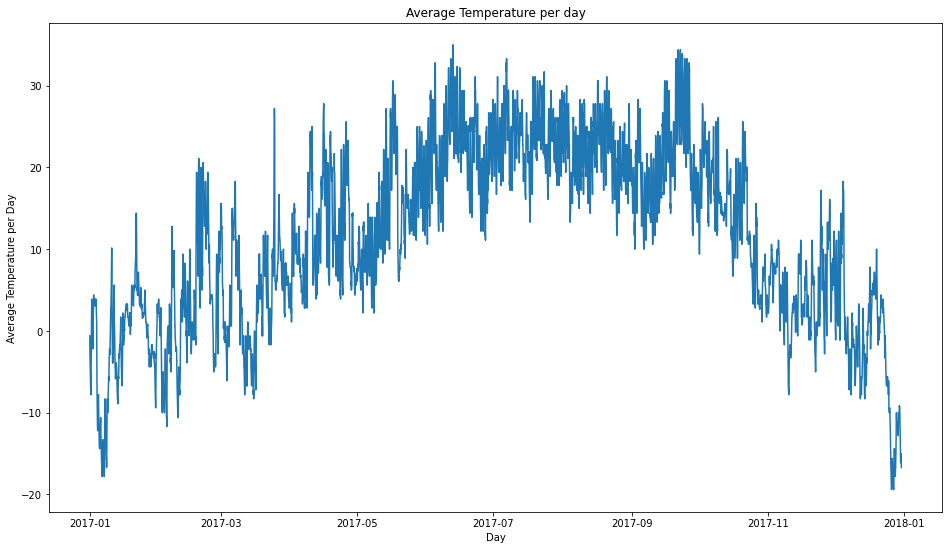

In [113]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chi_weather_2017_temp_hourly_mean)
ax.set_ylabel("Average Temperature per Hour")
ax.set_xlabel('Day')
ax.set_title('Average Temperature per Hour')
plt.show()

In [67]:
#fig, ax = plt.subplots(figsize = (16,9))

#ax.plot(chi_weather_2017_precip_hourly)
#plt.show()

## Weather Daily

In [115]:
chi_weather_2017_temp_daily_min = chi_weather_2017.groupby("Date")["min_temp"].mean()
chi_weather_2017_temp_daily_max = chi_weather_2017.groupby("Date")["max_temp"].mean()
chi_weather_2017_temp_daily_mean = chi_weather_2017.groupby("Date")["mean_temp"].mean()
chi_weather_2017_precip_daily = chi_weather_2017.groupby("Date")["precip"].mean()

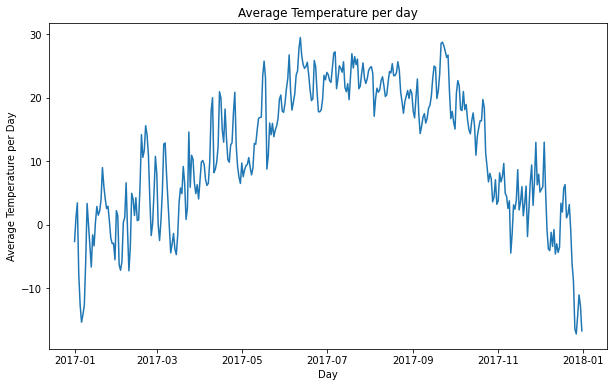

In [116]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(chi_weather_2017_temp_daily_mean)
ax.set_ylabel("Average Temperature per Day")
ax.set_xlabel('Day')
ax.set_title('Average Temperature per day')
plt.show()

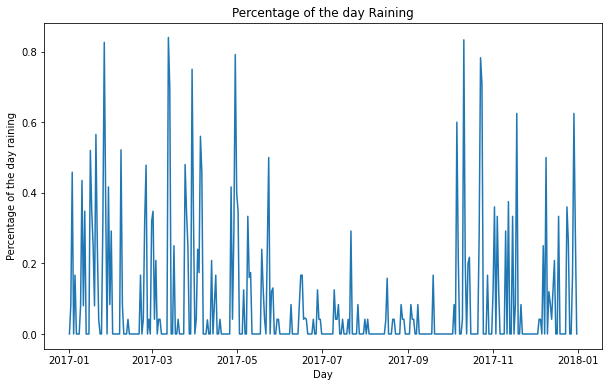

In [117]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(chi_weather_2017_precip_daily)
ax.set_title("Percentage of the day Raining")
ax.set_ylabel("Percentage of the day raining")
ax.set_xlabel('Day')


plt.show()

## Weather Weekly 

In [121]:
chi_weather_2017_temp_weekly_min = chi_weather_2017.groupby("Week")["min_temp"].mean()
chi_weather_2017_temp_weekly_max = chi_weather_2017.groupby("Week")["max_temp"].mean()
chi_weather_2017_temp_weekly_mean = chi_weather_2017.groupby("Week")["mean_temp"].mean()
chi_weather_2017_precip_weekly = chi_weather_2017.groupby("Week")["precip"].mean()

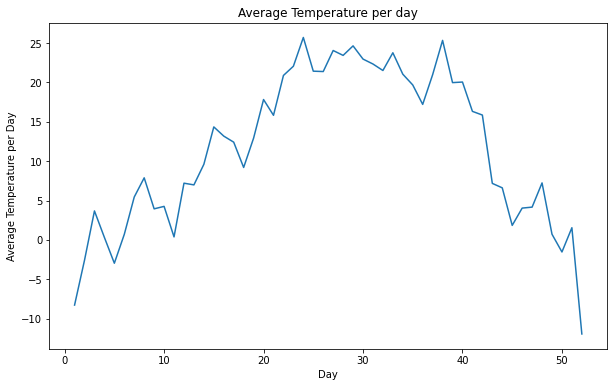

In [122]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(chi_weather_2017_temp_weekly_mean)
ax.set_ylabel("Average Temperature per Day")
ax.set_xlabel('Day')
ax.set_title('Average Temperature per day')
plt.show()

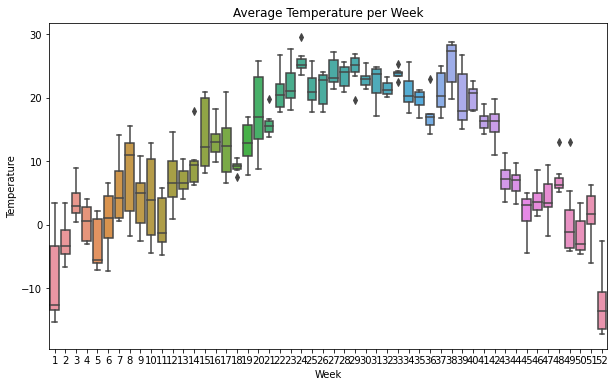

In [133]:
chi_weather_2017_temp_weekly_mean_bp = chi_weather_2017.groupby(['Date','Week'])['mean_temp'].mean()
chi_weather_2017_temp_weekly_mean_bp = pd.DataFrame(chi_weather_2017_temp_weekly_mean_bp)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = chi_weather_2017_temp_weekly_mean_bp.index.get_level_values('Week'), y =chi_weather_2017_temp_monthly_mean_bp['mean_temp'], ax = ax)

ax.set_title('Average Temperature per Week')
ax.set_ylabel("Temperature")
ax.set_xlabel("Week")
plt.show()

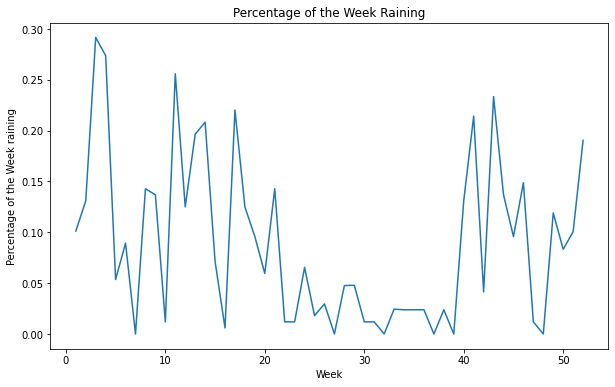

In [124]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(chi_weather_2017_precip_weekly)
ax.set_title("Percentage of the Week Raining")
ax.set_ylabel("Percentage of the Week raining")
ax.set_xlabel('Week')


plt.show()

## Weather Month

In [126]:
chi_weather_2017_temp_monthly_min = chi_weather_2017.groupby("Month")["min_temp"].mean()
chi_weather_2017_temp_monthly_max = chi_weather_2017.groupby("Month")["max_temp"].mean()
chi_weather_2017_temp_monthly_mean = chi_weather_2017.groupby("Month")["mean_temp"].mean()
chi_weather_2017_precip_monthly = chi_weather_2017.groupby("Month")["precip"].mean()

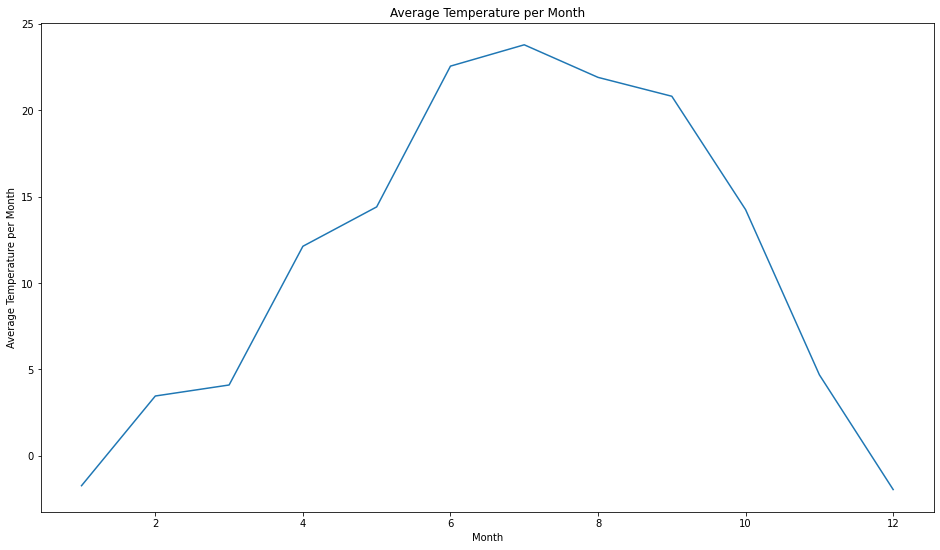

In [127]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chi_weather_2017_temp_monthly_mean)
ax.set_xlabel('Month')
ax.set_ylabel('Average Temperature per Month')
ax.set_title("Average Temperature per Month")

plt.show()

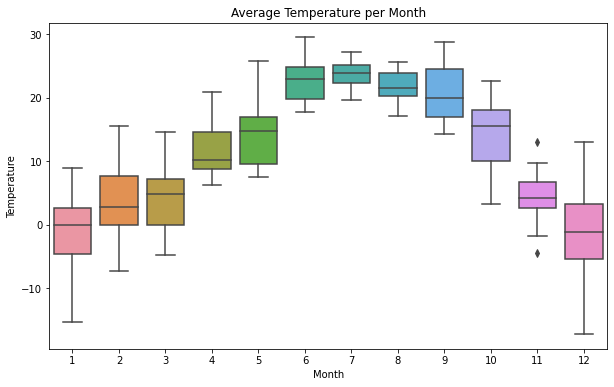

In [131]:
chi_weather_2017_temp_monthly_mean_bp = chi_weather_2017.groupby(['Date','Month'])['mean_temp'].mean()
chi_weather_2017_temp_monthly_mean_bp = pd.DataFrame(chi_weather_2017_temp_monthly_mean_bp)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = chi_weather_2017_temp_monthly_mean_bp.index.get_level_values('Month'), y =chi_weather_2017_temp_monthly_mean_bp['mean_temp'], ax = ax)

ax.set_title('Average Temperature per Month')
ax.set_ylabel("Temperature")
ax.set_xlabel("Month")
plt.show()

In [ ]:
chi_weather_2017_temp_monthly_mean

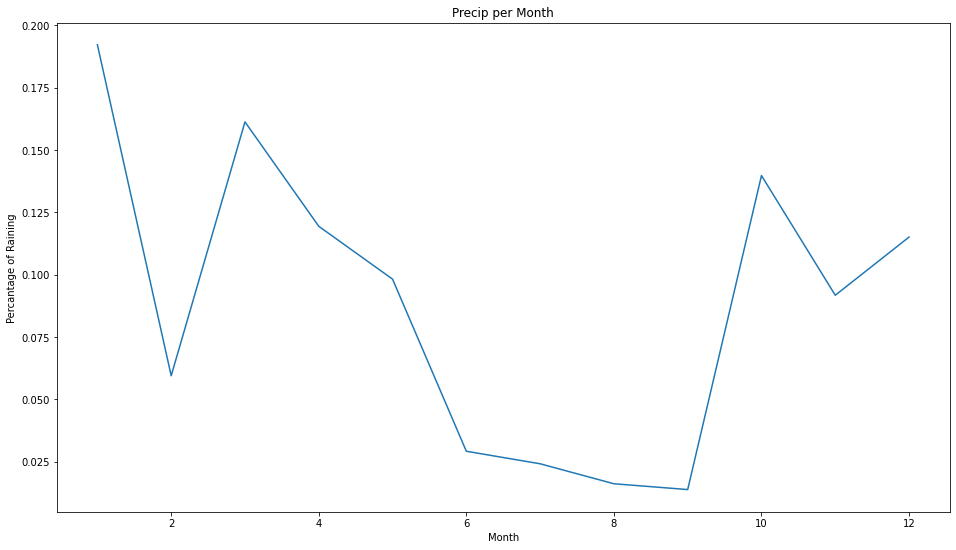

In [48]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chi_weather_2017_precip_monthly)

ax.set_xlabel('Month')
ax.set_ylabel('Percantage of Raining')
ax.set_title("Precip per Month")

plt.show()

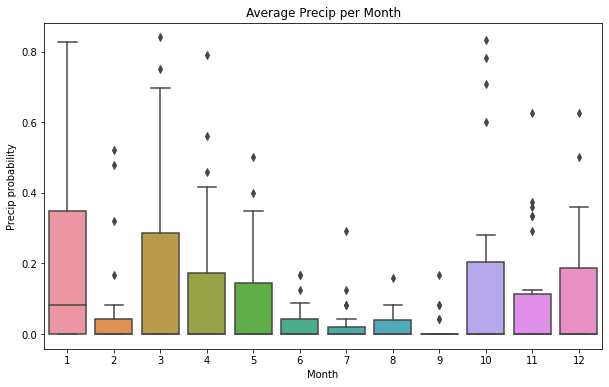

In [163]:
chi_weather_2017_precip_monthly_mean_bp = chi_weather_2017.groupby(['Date','Month'])['precip'].mean()
chi_weather_2017_precip_monthly_mean_bp = pd.DataFrame(chi_weather_2017_precip_monthly_mean_bp)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = chi_weather_2017_precip_monthly_mean_bp.index.get_level_values('Month'), y =chi_weather_2017_precip_monthly_mean_bp['precip'], ax = ax)

ax.set_title('Average Precip per Month')
ax.set_ylabel("Precip probability")
ax.set_xlabel("Month")
plt.show()

# Combination of Bike Usage Data and Weather Data

### Rescale Data - Bike Usage

In [152]:
rentals_day_rescaled = (rentals_day-rentals_day.min())/(rentals_day.max()-rentals_day.min())
chi_data_Month_avail_rescaled = ((chi_data_Month_avail-chi_data_Month_avail.min())/(chi_data_Month_avail.max()-chi_data_Month_avail.min()))

### Rescale Data - Weather

In [150]:
chi_weather_2017_precip_daily_rescaled = (chi_weather_2017_precip_daily-chi_weather_2017_precip_daily.min())/(chi_weather_2017_precip_daily.max()-chi_weather_2017_precip_daily.min())
chi_weather_2017_temp_daily_mean_rescaled = (chi_weather_2017_temp_daily_mean-chi_weather_2017_temp_daily_mean.min())/(chi_weather_2017_temp_daily_mean.max()-chi_weather_2017_temp_daily_mean.min())
chi_weather_2017_temp_monthly_mean_rescaled = ((chi_weather_2017_temp_monthly_mean-chi_weather_2017_temp_monthly_mean.min())/(chi_weather_2017_temp_monthly_mean.max()-chi_weather_2017_temp_monthly_mean.min()))

## Plot Bike Usage/Weather

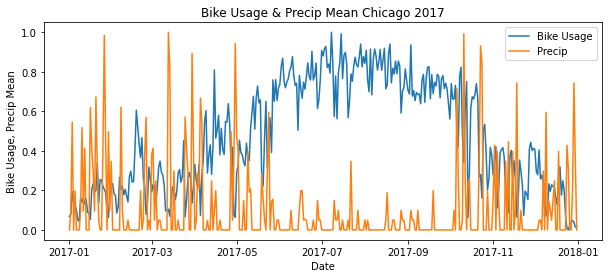

In [156]:
#hier nochmal das gleiche für jeden Monat --> Scatter Plot, Group by Week
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(rentals_day_rescaled, label='Bike Usage')
ax.plot(chi_weather_2017_precip_daily_rescaled, label='Precip')

ax.set_title('Bike Usage & Precip Mean Chicago 2017')
ax.set_xlabel('Date')
ax.set_ylabel('Bike Usage, Precip Mean')
ax.legend()

plt.show()

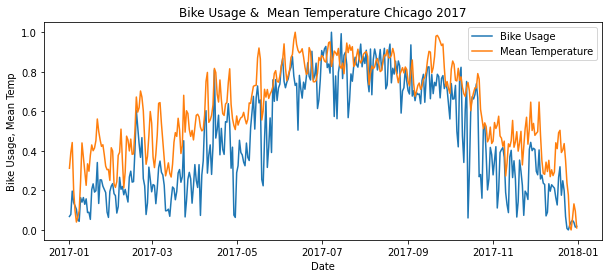

In [155]:
#hier nochmal das gleiche für jeden Monat
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(rentals_day_rescaled, label='Bike Usage')
ax.plot(chi_weather_2017_temp_daily_mean_rescaled, label='Mean Temperature')

ax.set_title('Bike Usage &  Mean Temperature Chicago 2017')
ax.set_xlabel('Date')
ax.set_ylabel('Bike Usage, Mean Temp')
ax.legend()

plt.show()

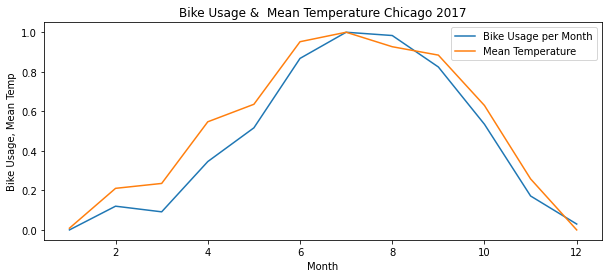

In [154]:
#Temperatur für jeden Monat
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(chi_data_Month_avail_rescaled, label='Bike Usage per Month')
ax.plot(chi_weather_2017_temp_monthly_mean_rescaled, label='Mean Temperature')

ax.set_title('Bike Usage &  Mean Temperature Chicago 2017')
ax.set_xlabel('Month')
ax.set_ylabel('Bike Usage, Mean Temp')
ax.legend()

plt.show()

In [158]:
chi_weather_2017_temp_hourly_mean_2 = chi_weather_2017.groupby(["Date", "Hour"])["mean_temp"].mean()

In [159]:
rentals_hour_2 = chi_data.groupby(['Date','Hour'])['bike_id'].count()
rentals_hour_2 = pd.DataFrame(rentals_hour_2)
rentals_hour_2

bike_id
Date       Hour         
2017-01-01 0          46
           1          46
           2          36
           3          18
           4           6
...                  ...
2017-12-31 19         20
           20         20
           21         13
           22          9
           23          9

[8743 rows x 1 columns]

In [160]:
UsageHour_Temp = pd.DataFrame(chi_weather_2017_temp_hourly_mean_2)
UsageHour_Temp ["Usage_Hour"] = rentals_hour_2['bike_id']

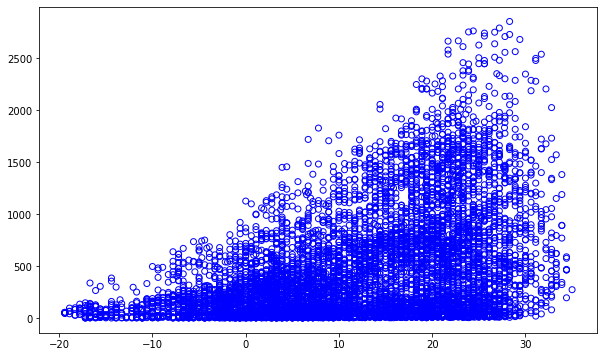

In [161]:

fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(UsageHour_Temp["mean_temp"], UsageHour_Temp["Usage_Hour"], color = "none", edgecolor = "blue")

plt.show()

In [ ]:
plt.figure(figsize=)

Using graph structural information about flows to enhance short-term T demand prediction in bike-sharing systems
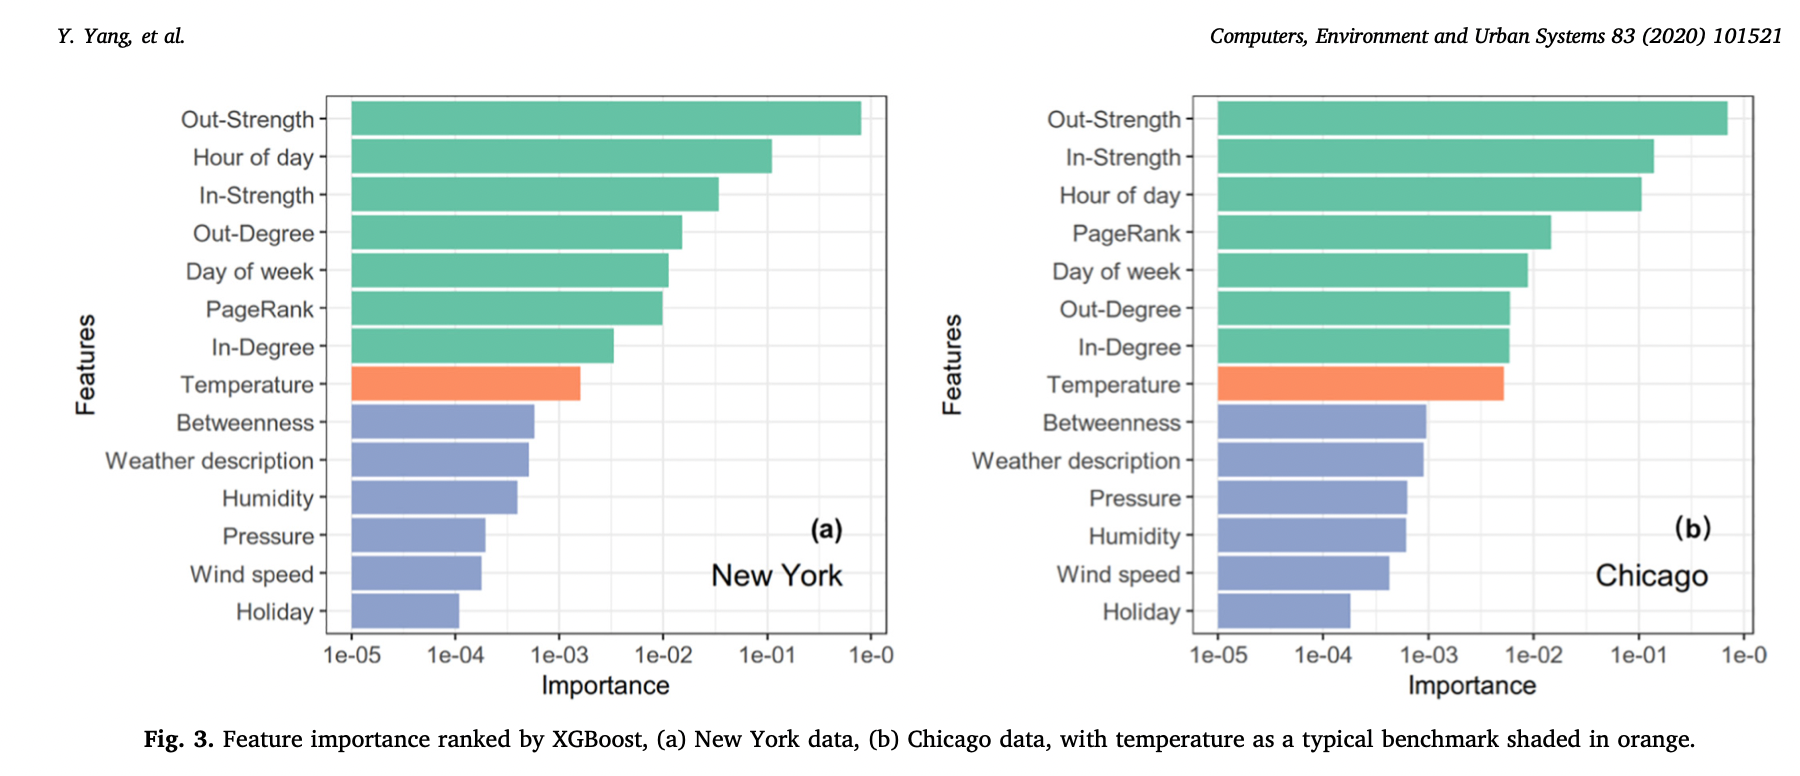

Using data mining techniques for bike sharing demand prediction in metropolitan city
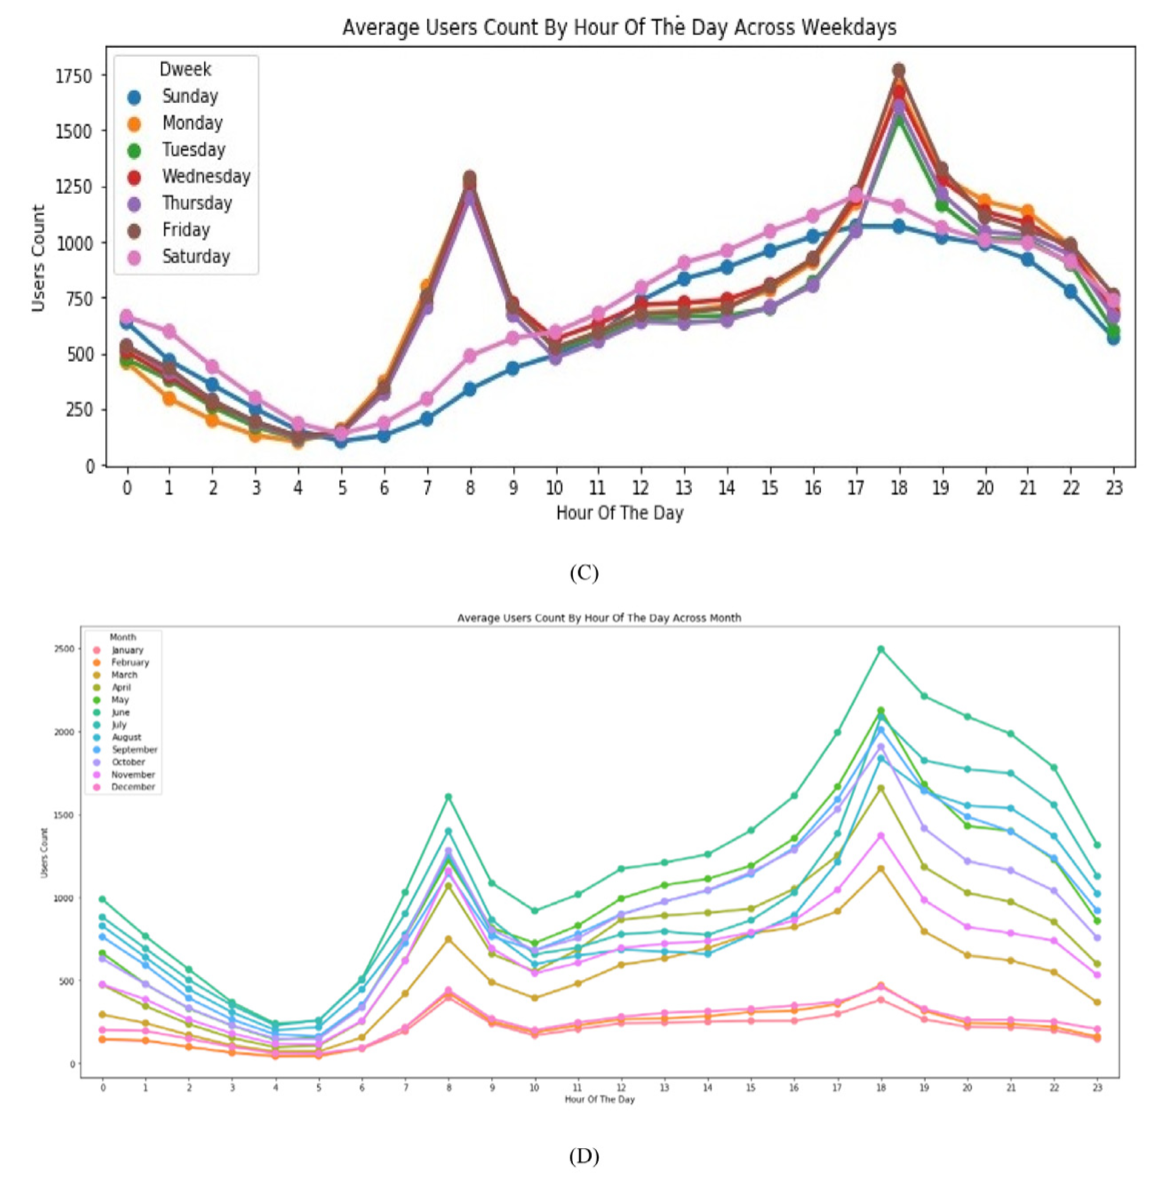
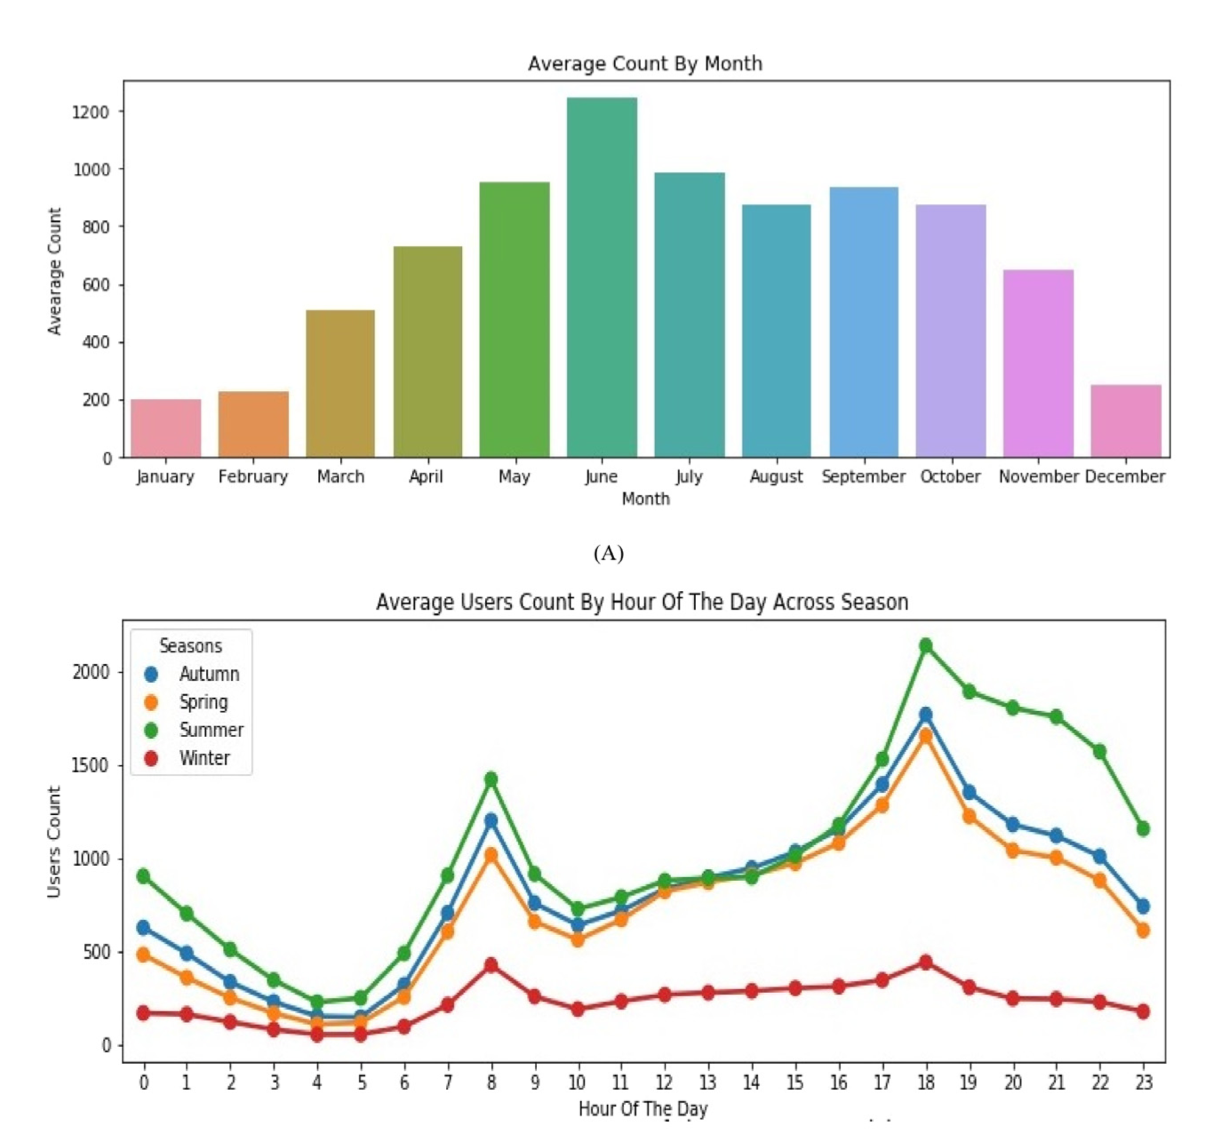
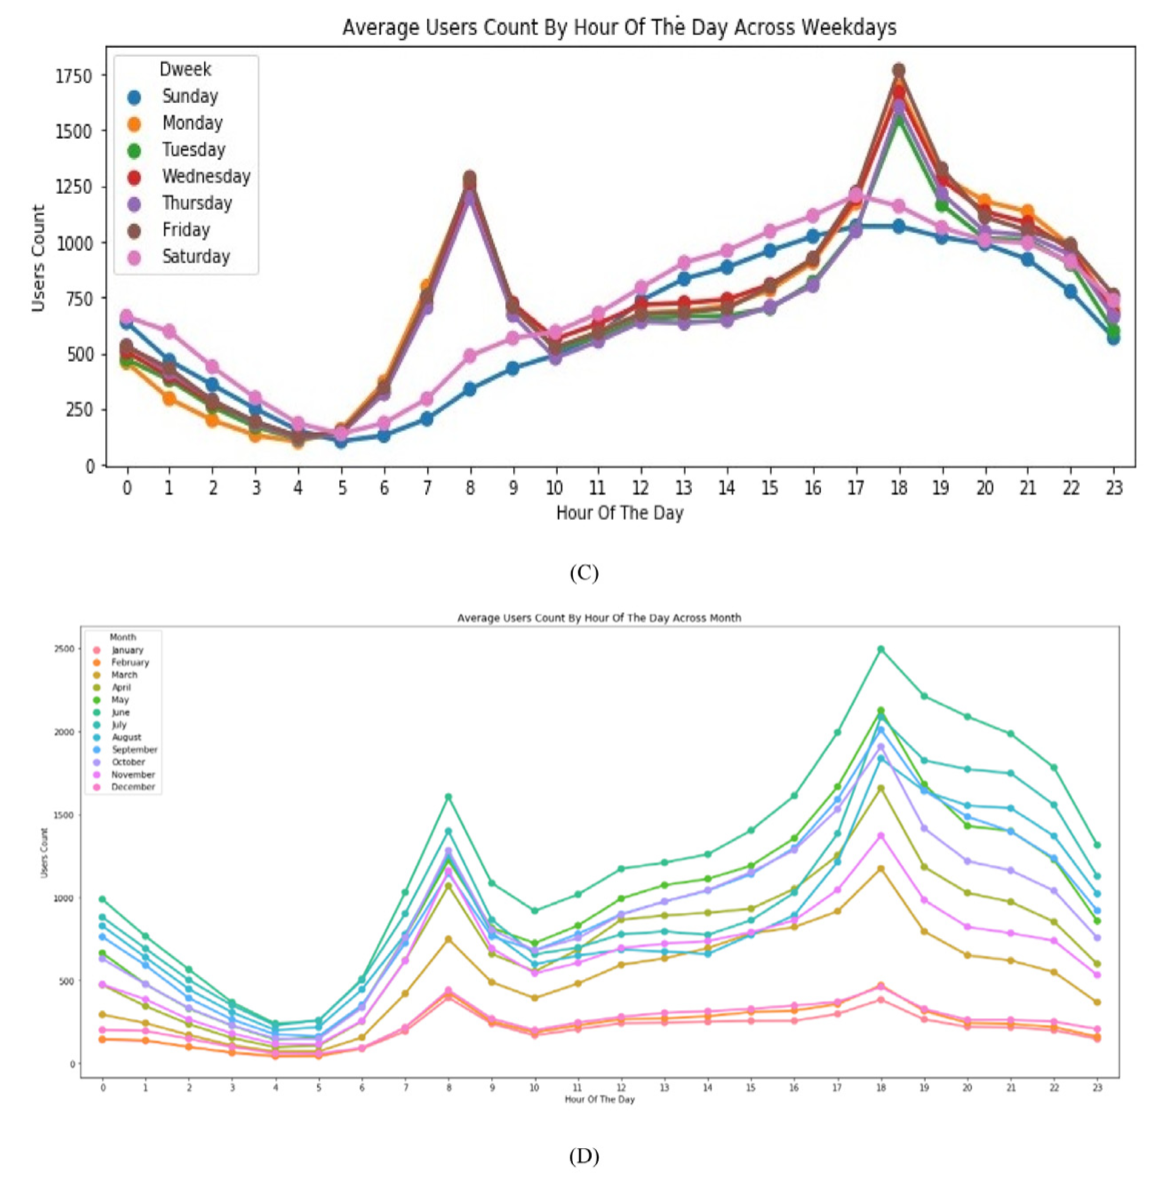
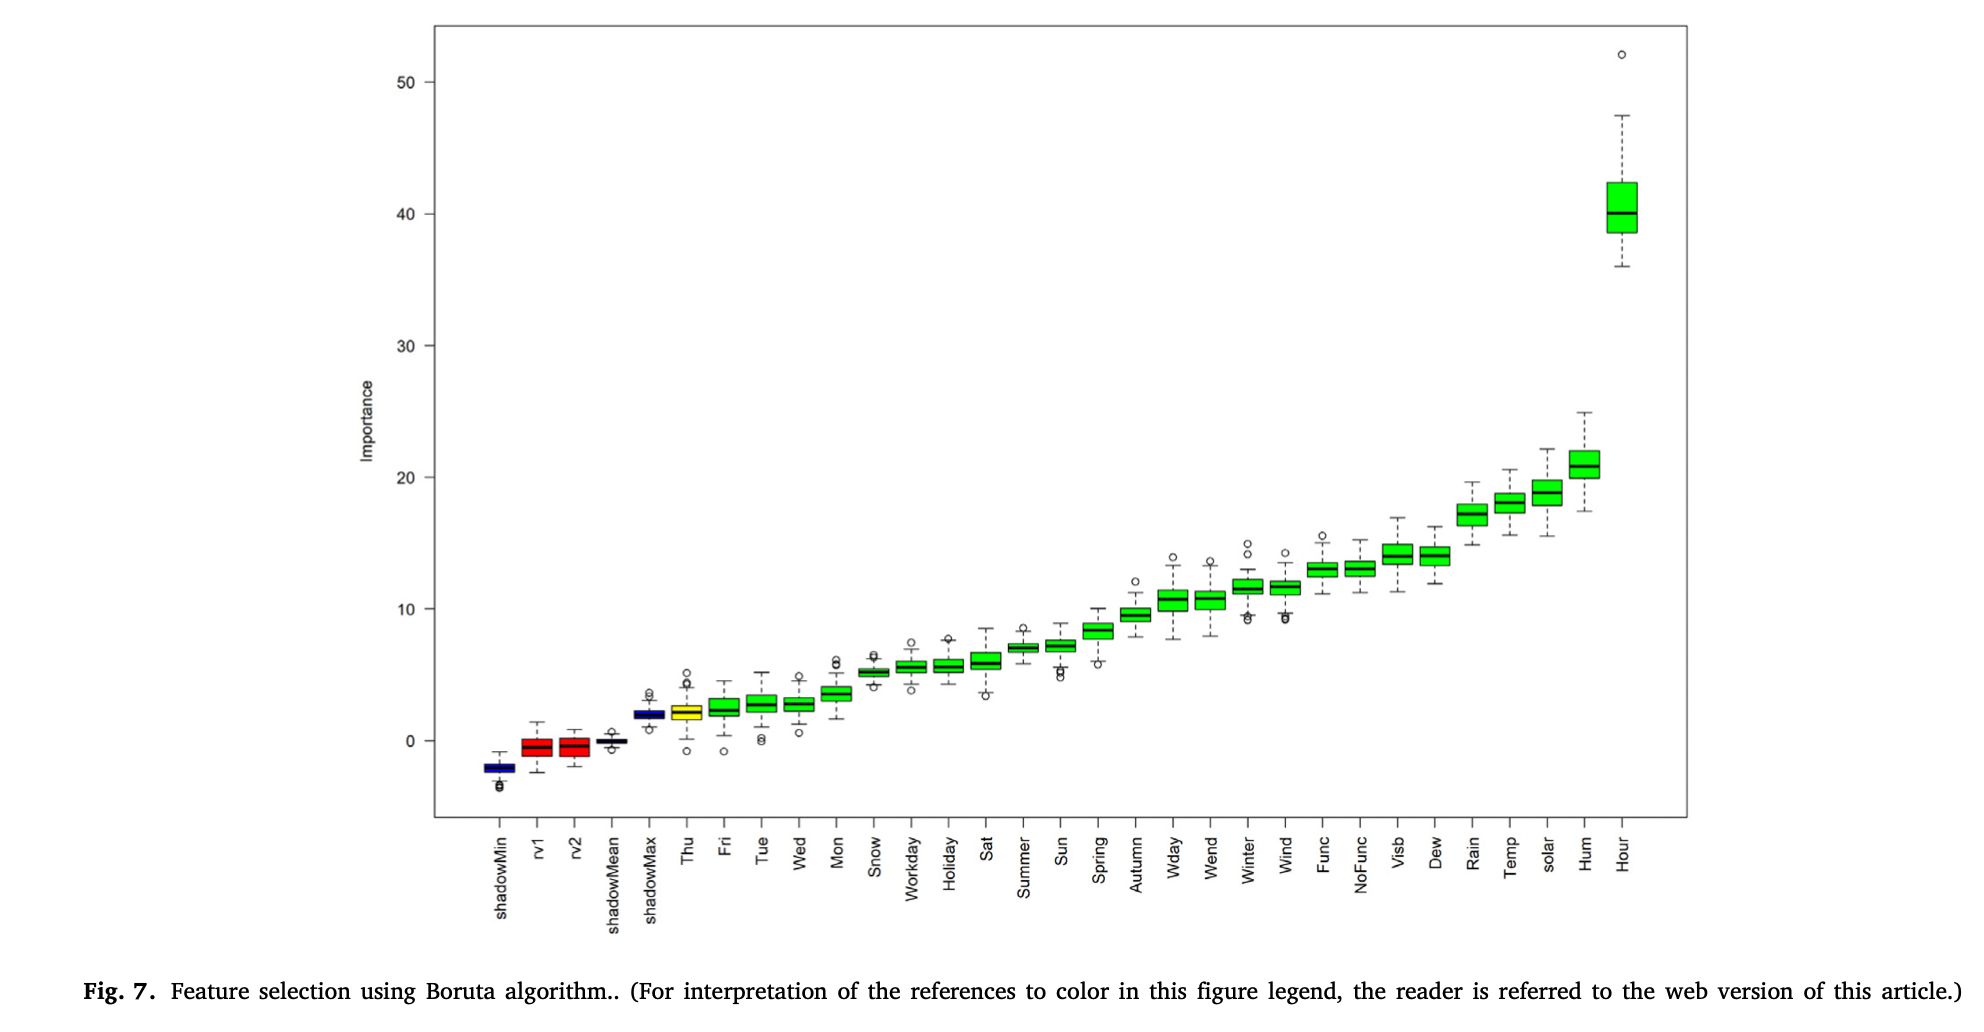
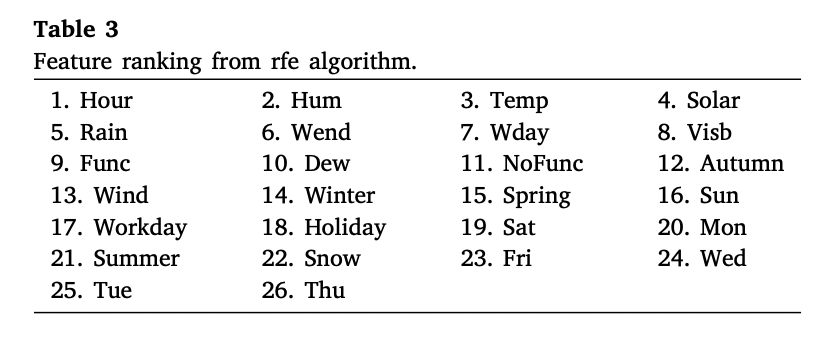
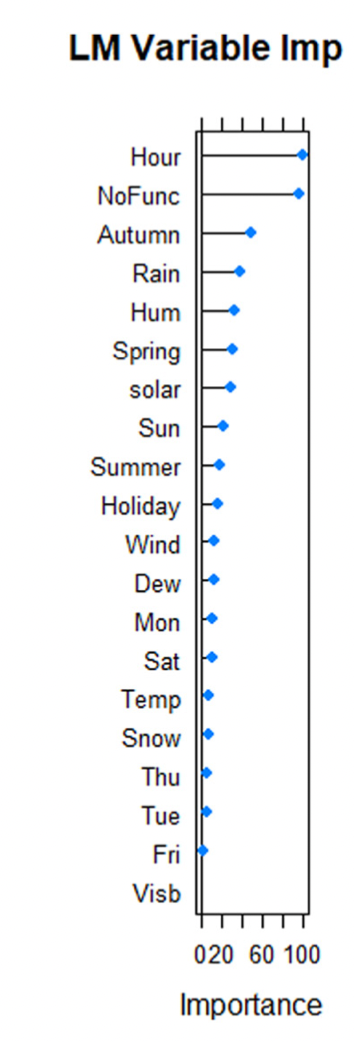

Dynamic Cluster-Based Over-Demand Prediction in Bike Sharing Systems
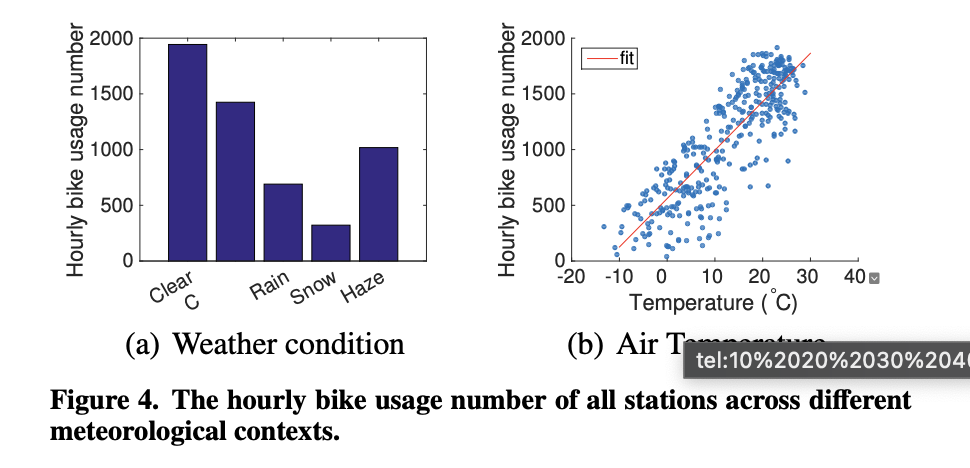

In [ ]:
![image.png](attachment:image.png)